In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
data_users = pd.read_table("../assets/ml-1m/users.dat", sep="::", engine="python", names=unames)
data_users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [104]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
data_ratings = pd.read_table("../assets/ml-1m/ratings.dat", sep="::", engine="python", names=rnames)
data_ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [105]:
mnames = ['movie_id', 'title', 'genre']
data_movies = pd.read_table("../assets/ml-1m/movies.dat", sep="::", engine="python", encoding="windows-1251", names=mnames)
data_movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [106]:
data_users.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zip           0
dtype: int64

In [107]:
data_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [108]:
users_ratings_merge = data_users.merge(data_ratings, left_on='user_id', right_on='user_id')
users_ratings_merge

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [109]:
all_data = users_ratings_merge.merge(data_movies, left_on='movie_id', right_on='movie_id')
all_data

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [110]:
ratings_by_title = all_data.groupby('title').size()
ratings_by_title.sort_values(ascending=False).head(10)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

In [111]:
ages = data_users.age.unique()
genders = data_users.gender.unique()
ages = np.sort(ages)
ages

array([ 1, 18, 25, 35, 45, 50, 56], dtype=int64)

In [112]:
age_pivot = all_data.pivot_table('rating', index='title', columns=['age', 'gender'], aggfunc='sum')
top_by_age_and_gender_all = []
for age in ages:
    for gender in genders:
         top_by_age_and_gender_all.append(
             age_pivot.filter(items=[(age, gender)]).sort_values(by=(age, gender), ascending=False)
         )
top10_by_age_and_gender = [table.head(10) for table in top_by_age_and_gender_all]
age_pivot.head(10)

age                                   1            18            25         \
gender                                 F     M      F      M      F      M   
title                                                                        
$1,000,000 Duck (1971)               NaN   NaN    5.0   13.0   10.0   24.0   
'Night Mother (1986)                 3.0   1.0    9.0    5.0   63.0   26.0   
'Til There Was You (1997)            2.0   5.0   16.0    4.0   56.0    8.0   
'burbs, The (1989)                   NaN   9.0   85.0  207.0   94.0  211.0   
...And Justice for All (1979)        NaN   3.0    NaN   24.0   34.0  182.0   
1-900 (1994)                         NaN   NaN    NaN    NaN    2.0    NaN   
10 Things I Hate About You (1999)  113.0  93.0  272.0  592.0  313.0  583.0   
101 Dalmatians (1961)               61.0  62.0  163.0  239.0  192.0  491.0   
101 Dalmatians (1996)               59.0  46.0   58.0   95.0  154.0  174.0   
12 Angry Men (1957)                 36.0  35.0   88.0  283.0  190.0  727.0   

age                                   35           45           50         \
gender                                 F      M     F      M     F      M   
title                                                                       
$1,000,000 Duck (1971)              29.0   18.0   NaN    2.0  10.0    1.0   
'Night Mother (1986)                21.0   40.0  15.0    8.0  11.0   21.0   
'Til There Was You (1997)            9.0   20.0   5.0    2.0   5.0    NaN   
'burbs, The (1989)                  49.0  106.0   6.0   22.0  22.0   55.0   
...And Justice for All (1979)       45.0  211.0  20.0   62.0  22.0   81.0   
1-900 (1994)                         NaN    NaN   NaN    NaN   NaN    NaN   
10 Things I Hate About You (1999)   61.0  150.0  44.0   57.0  39.0   59.0   
101 Dalmatians (1961)              160.0  280.0  56.0  115.0  66.0   80.0   
101 Dalmatians (1996)              136.0  169.0  34.0   67.0  34.0   51.0   
12 Angry Men (1957)                100.0  423.0  57.0  208.0  79.0  204.0   

age                                  56         
gender                                F      M  
title                                           
$1,000,000 Duck (1971)              NaN    NaN  
'Night Mother (1986)                NaN   13.0  
'Til There Was You (1997)           6.0    2.0  
'burbs, The (1989)                  1.0   15.0  
...And Justice for All (1979)      13.0   42.0  
1-900 (1994)                        NaN    3.0  
10 Things I Hate About You (1999)   4.0   16.0  
101 Dalmatians (1961)              11.0   56.0  
101 Dalmatians (1996)              11.0   21.0  
12 Angry Men (1957)                40.0  176.0

In [113]:
rating_by_sex = all_data.pivot_table('rating', index='title', columns='gender', aggfunc='sum')
rating_for_M = rating_by_sex.filter(items='M')
rating_for_F = rating_by_sex.filter(items='F')
top10_for_M = rating_for_M.sort_values(by='M', ascending=False).head(10)
top10_for_F = rating_for_F.sort_values(by='F', ascending=False).head(10)
rating_by_sex.head(10)

gender,F,M
title,,
"$1,000,000 Duck (1971)",54.0,58.0
'Night Mother (1986),122.0,114.0
'Til There Was You (1997),99.0,41.0
"'burbs, The (1989)",257.0,625.0
...And Justice for All (1979),134.0,605.0
1-900 (1994),2.0,3.0
10 Things I Hate About You (1999),846.0,1550.0
101 Dalmatians (1961),709.0,1323.0
101 Dalmatians (1996),486.0,623.0



---

# TOP-10 films by gender

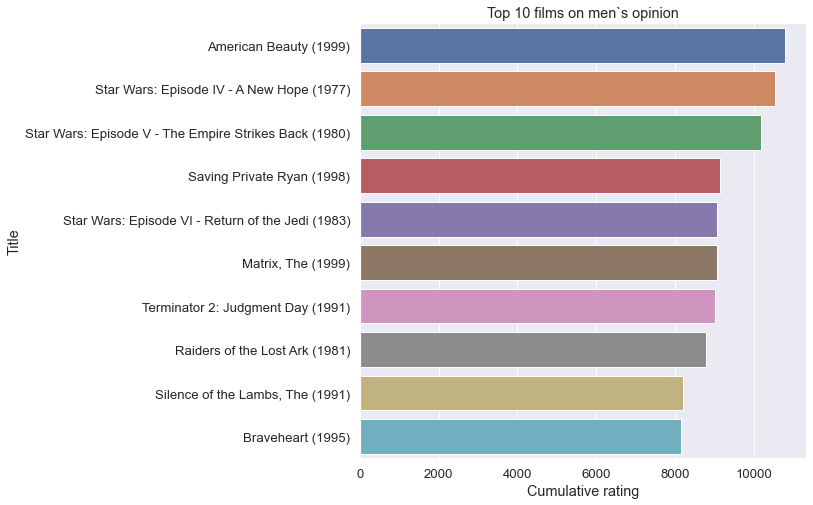

In [114]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8,8))
pl_M = sns.barplot(data=top10_for_M, y = top10_for_M.index, x = 'M')
pl_M.set(xlabel='Cumulative rating', ylabel='Title', title='Top 10 films on men`s opinion')
plt.show()

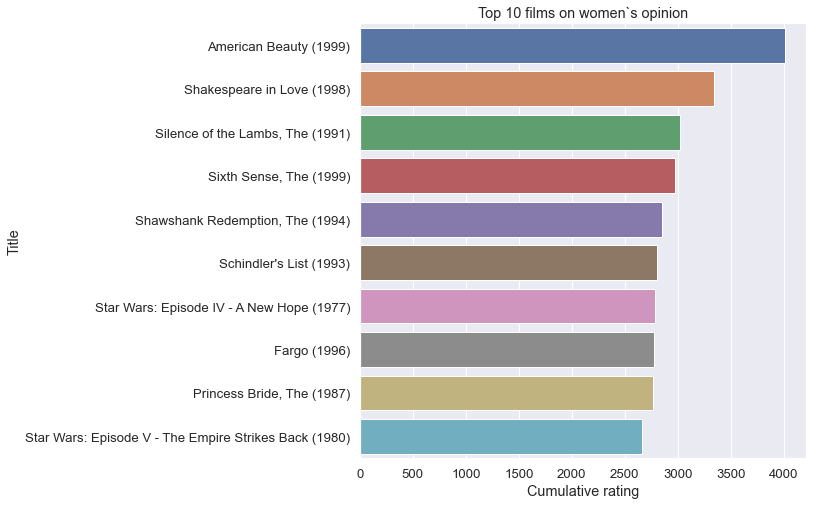

In [115]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8,8))
pl_F = sns.barplot(data=top10_for_F, y = top10_for_F.index, x='F')
pl_F.set(xlabel='Cumulative rating', ylabel='Title', title='Top 10 films on women`s opinion')
plt.show()


---

# TOP-10 films by age and gender

### Age is chosen from the following ranges:

-  1:  "Under 18"
- 18:  "18-24"
- 25:  "25-34"
- 35:  "35-44"
- 45:  "45-49"
- 50:  "50-55"
- 56:  "56+"

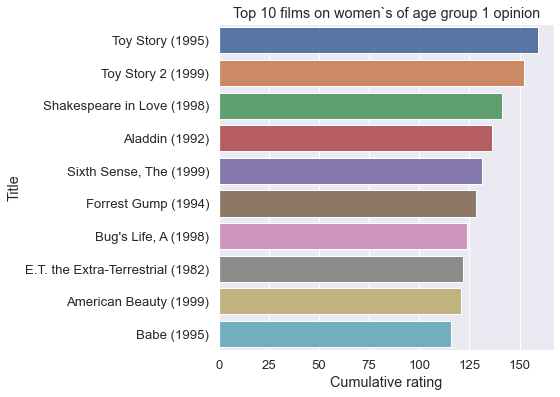

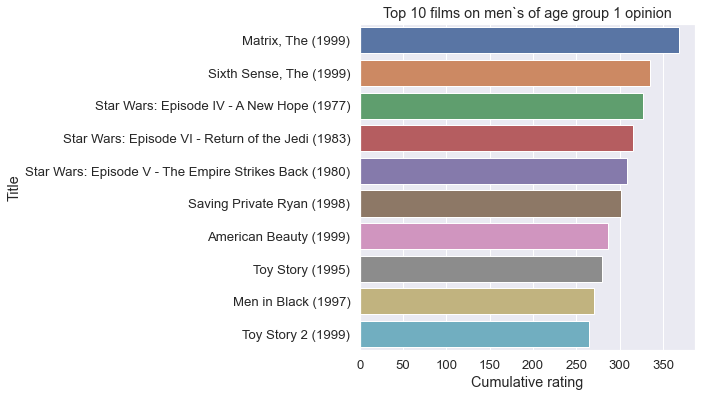

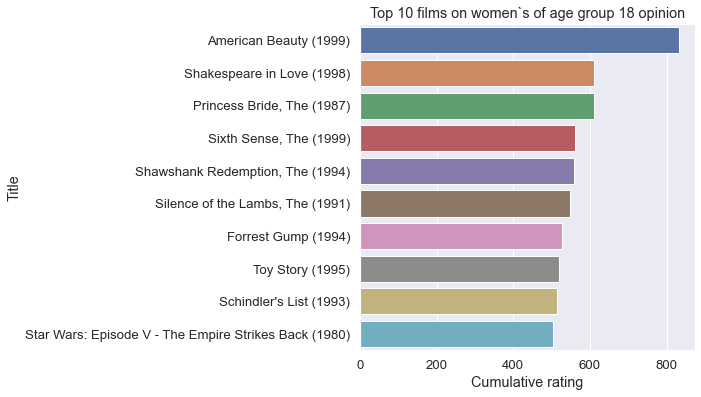

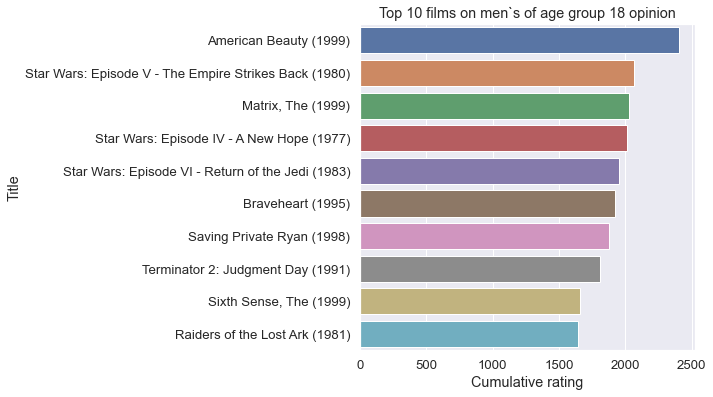

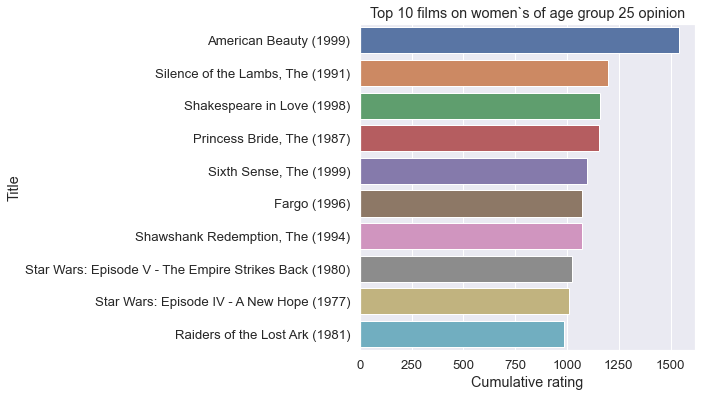

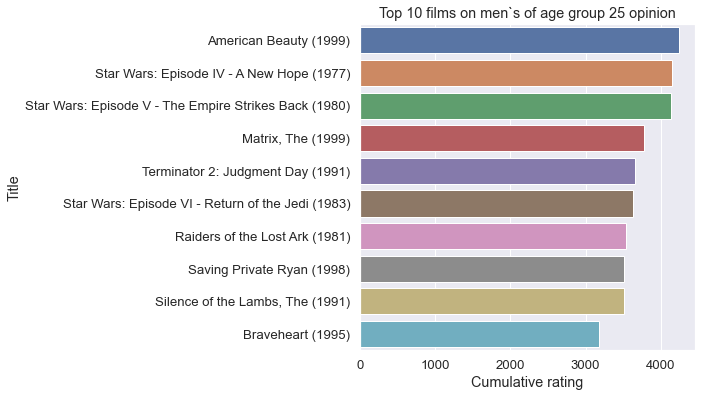

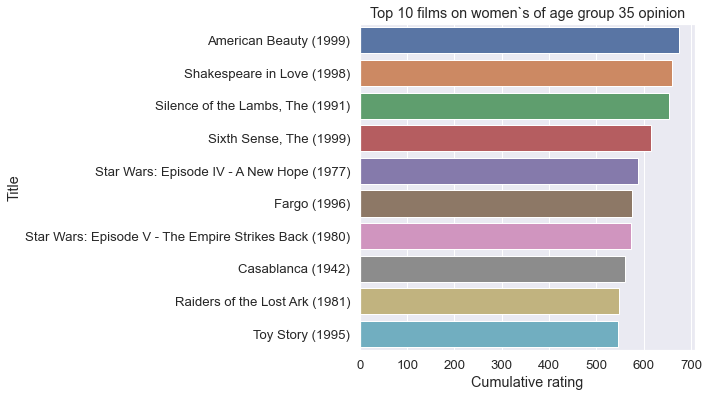

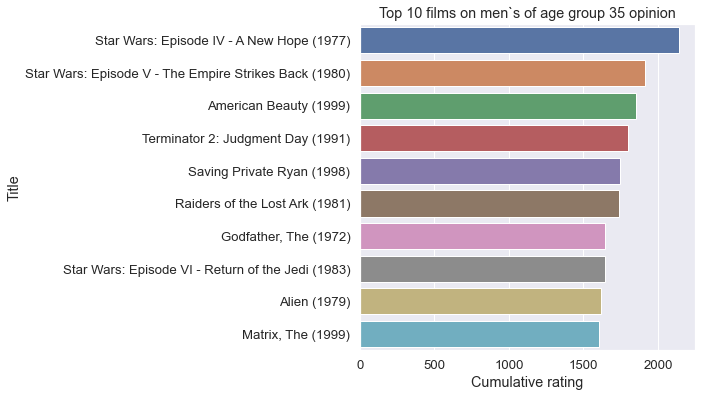

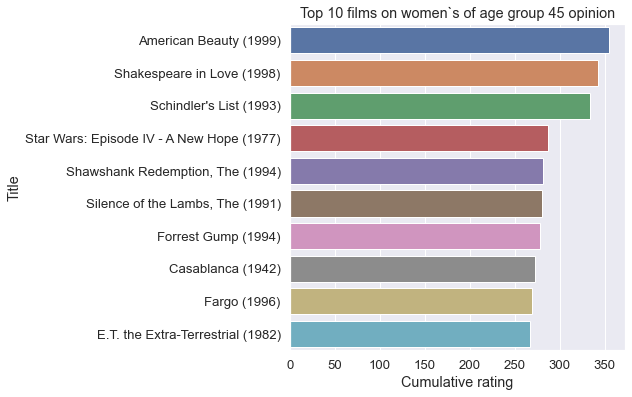

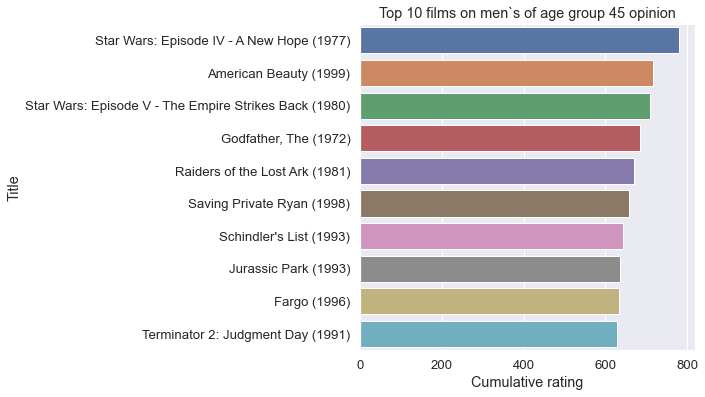

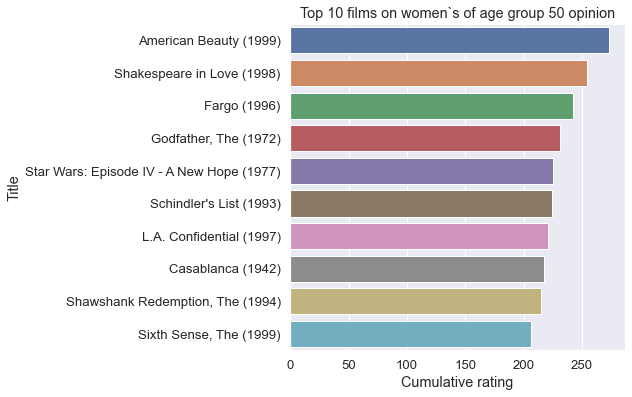

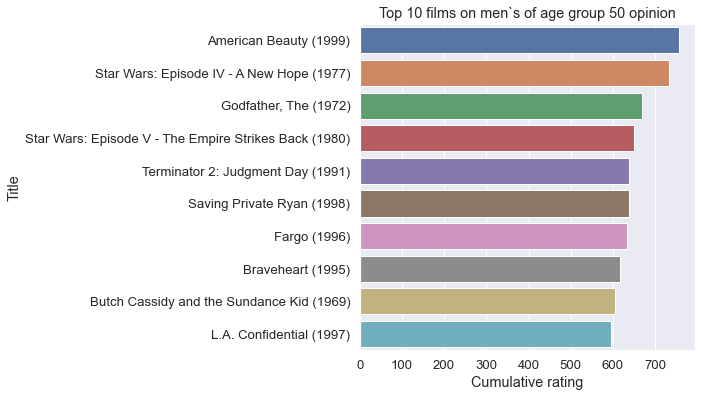

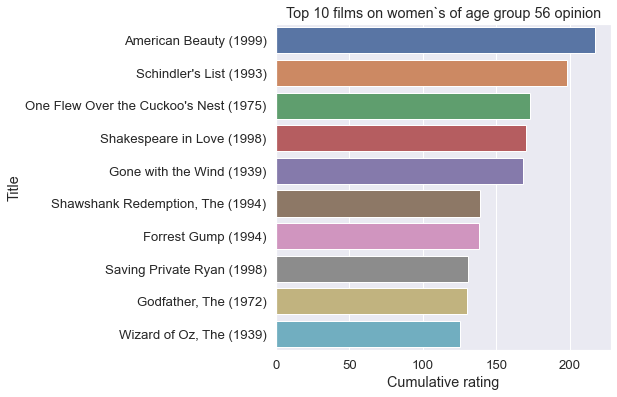

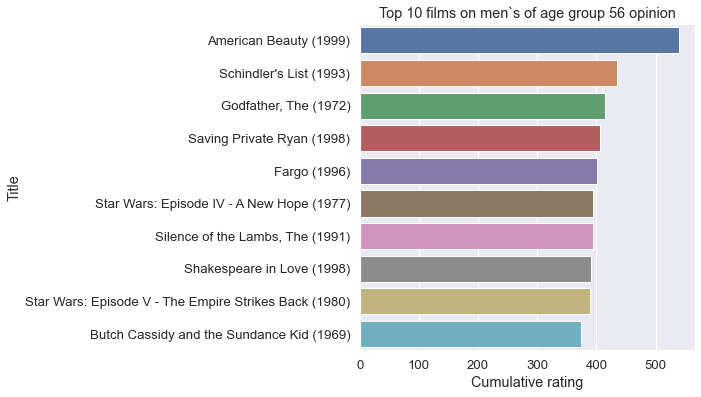

In [116]:
for dataframe in top10_by_age_and_gender:
        sns.set(font_scale=1.2)
        plt.figure(figsize=(6,6))
        plot = sns.barplot(data=dataframe, y = dataframe.index, x=dataframe.columns[0])
        plot.set(
            title=f"Top 10 films on {('women`s' if dataframe.columns[0][1] == 'F' else 'men`s')} of age group {dataframe.columns[0][0]} opinion",
            xlabel='Cumulative rating',
            ylabel = 'Title',
        )
plt.show()